# Natural language processing

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
toxic = pd.read_csv('toxic.csv')
#Посчитаем количество комментариев для каждой категории токсичности:
category_counts = toxic.iloc[:, 2:].sum()
category_counts

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [ ]:
count = len(toxic['comment_text'])
print(f"Количество строк в столбце 'comment_text': {count}")

Количество строк в столбце 'comment_text': 159571


In [ ]:
toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# Фильтрация данных по условию суммы по категориям токсичности
filtered_rows = toxic[(toxic['toxic'] + toxic['severe_toxic'] + toxic['obscene'] + toxic['threat'] + toxic['insult'] + toxic['identity_hate']) >= 2]

# Подсчет количества отфильтрованных строк
count = len(filtered_rows)
print("Количество строк с суммой по категориям токсичности 2 и более:", count)

Количество строк с суммой по категориям токсичности 2 и более: 9865


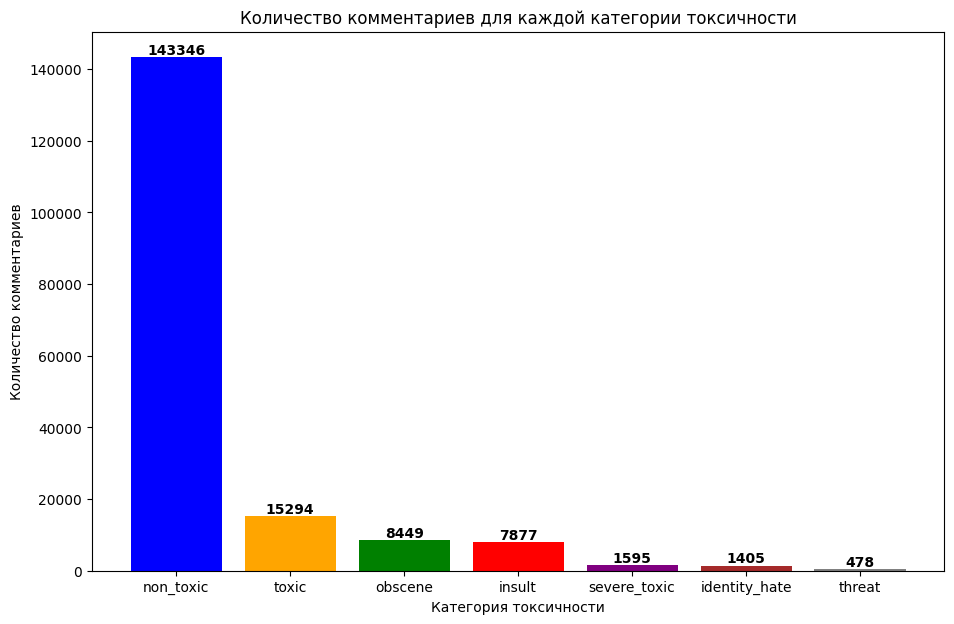

In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']

#Добавим новый столбец `non_toxic`, который будет иметь значение 1, если соответствующий комментарий не является токсичным
#(то есть не содержит ни одного признака токсичности из столбцов `toxic_col`), и значение 0, если комментарий является токсичным.
toxic_col = toxic.columns[2:]
def not_tox(row,df_col):
  for a in df_col:
    if row[a] == 1:
      return 0
  return 1
toxic['non_toxic']=toxic.apply(lambda row: not_tox(row, toxic_col), axis=1)

category_counts = toxic.iloc[:, 2:].sum()
#Отсортируем категории в порядке убывания
category_counts = category_counts.sort_values(ascending=False)
#зададим цвета как на примере
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'grey']
fig = plt.figure(figsize = (11,7))
plt.bar(category_counts.index, category_counts, color=colors)
plt.xlabel('Категория токсичности')
plt.ylabel('Количество комментариев')
plt.title('Количество комментариев для каждой категории токсичности')

# Добавим подписи данных на график сверху жирным шрифтом
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
category_counts

non_toxic        143346
toxic             15294
obscene            8449
insult             7877
severe_toxic       1595
identity_hate      1405
threat              478
dtype: int64

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев:
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены, состоящие только из английских символов
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [ ]:
! pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import re

In [ ]:
# Перед первым использованием, раскомментируйте следующую строку и выполните ее, чтобы скачать необходимые ресурсы
nltk.download('punkt')
nltk.download('stopwords')

# Загружаем стоп-слова
stopwords = set(stopwords.words('english'))

def process_comment(comment):
    # Приводим текст к нижнему регистру
    comment = comment.lower()
    # Токенизируем текст
    tokens = word_tokenize(comment)
    # Оставляем только токены состоящие из английских символов
    tokens = [token for token in tokens if re.match('^[a-zA-Z]+$', token)]
    # Убираем знаки препинания и цифры
    tokens = [token for token in tokens if token not in punctuation and not token.isdigit()]
    # Убираем стоп-слова
    tokens = [token for token in tokens if token not in stopwords]

    return tokens
#Токенизировав комментарии мы узнали сколько слов содержится в каждом комментарии (одно слово = токен)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ксения\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ксения\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Индекс комментария, для которого нужно вывести результат
comment_index = toxic[toxic['id'] == '000103f0d9cfb60f'].index.item()

# Обработка комментария и вывод количества токенов
comment = toxic.loc[comment_index, 'comment_text']
tokens = process_comment(comment)
print(f"Количество токенов для комментария с индексом 000103f0d9cfb60f: {len(tokens)}")

Количество токенов для комментария с индексом 000103f0d9cfb60f: 9


In [ ]:
toxic['tokenized_comment'] = toxic['comment_text'].apply(process_comment)
toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,tokenized_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,"[matches, background, colour, seemingly, stuck..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,"[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,"[ca, make, real, suggestions, improvement, won..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,"[sir, hero, chance, remember, page]"


###### Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

TF-IDF (Term Frequency-Inverse Document Frequency) - это статистическая мера, которая используется для оценки важности слова в документе или коллекции документов. Она состоит из двух компонентов: `TF` (Частота слова в документе) и `IDF` (Обратная частота документа).

`TF` (Частота слова в документе) измеряет, насколько часто слово встречается в документе. Более высокое значение `TF` для слова указывает на большую важность этого слова в документе.

`IDF` (Обратная частота документа) измеряет, насколько уникально слово является в коллекции документов. Слова, которые появляются редко в коллекции, имеют более высокое значение `IDF`, а слова, которые появляются часто, имеют более низкое значение `IDF`. Это позволяет отличать общие слова от более редких и информативных.

TF-IDF вычисляется путем перемножения значения `TF` и значения `IDF` для каждого слов

In [ ]:
#categories_toxic = categories.copy()
#categories_toxic.remove('non_toxic')

In [ ]:
toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,tokenized_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,"[matches, background, colour, seemingly, stuck..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,"[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,"[ca, make, real, suggestions, improvement, won..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,"[sir, hero, chance, remember, page]"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
x = toxic['tokenized_comment'].astype(str)
#y = toxic[categories_toxic]
y = toxic.loc[:, toxic.columns[4:9]]

#vectorizer = TfidfVectorizer(max_features=3000)
#x=vectorizer.fit_transform(x)

# Разделение выборки на тренировочную и тестовую
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=21, shuffle=True)

# Преобразование текста комментариев с помощью TF-IDF
vectorizer = TfidfVectorizer(use_idf = True, max_features=3000) #Инициализация `TfidfVectorizer` с указанием максимального количества признаков (`max_features`). В нашем случае, установлено `max_features=3000`, что означает, что только 3000 наиболее "важных" признаков (слов) будут участвовать в процессе преобразования.
x_train_tfidf = vectorizer.fit_transform(x_train) # Преобразование текста комментариев из тренировочной выборки в векторы TF-IDF
x_test_tfidf = vectorizer.transform(x_test)
# Вывод размерности тренировочной выборки после преобразования текста
print(f"Размерность тренировочной выборки после преобразования текста: {x_train_tfidf.shape}")


Размерность тренировочной выборки после преобразования текста: (111699, 3000)


In [ ]:
#print(f"Векторизированный x_train:{x_train_tfidf }")

## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score


# Обучение модели RidgeClassifier
ridge_clf = RidgeClassifier()
ridge_clf.fit(x_train_tfidf, y_train)

# Получение предсказаний для тестовой выборки
y_pred = ridge_clf.predict(x_test_tfidf)

# Вычисление ROC-AUC для каждой метки
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Значение ROC-AUC для тестовой выборки: {roc_auc}")

Значение ROC-AUC для тестовой выборки: 0.6723021269658089


## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель.
Получилось ли увеличить качество классификации?

In [ ]:
#!pip install joblib
#!pip install --upgrade scikit-learn
#!pip install profanity-check

1. Количество повторяющихся слов: Этот признак позволит определить, насколько часто встречаются одни и те же слова в комментариях.
   Более высокое значение может указывать на токсичность комментария, так как токсичные комментарии часто повторяют одни и те же
   негативные выражения или оскорбительные слова.

2. Количество знаков препинания: Данный признак отражает количество использованных знаков препинания в комментарии.
   Более высокое значение может указывать на агрессивность комментария, так как токсичные комментарии часто содержат
   много восклицательных знаков, вопросительных знаков или других знаков препинания для передачи эмоциональной окраски.

3. Доля уникальных слов: Этот признак позволяет оценить, насколько много уникальных слов используется в комментарии.
   Большое количество уникальных слов может указывать на то, что комментарий содержит разнообразную информацию, в то время
   как комментарии с низким значением данного признака могут быть более стереотипными и возможно содержать токсичные выражения.

4. Средняя длина слова: Данный признак отражает среднюю длину слова в комментарии. Более длинные слова могут указывать на более
   сложную или формализованную речь, в то время как более короткие слова могут указывать на более простую и возможно оскорбительную форму выражения.

5. Количество матерных слов: Этот признак отражает количество матерных слов в комментарии.
   Токсичные комментарии зачастую содержат ненормативную лексику, поэтому более высокое значение этого признака может указывать на токсичность комментария.

6. Количество слов, написанных только заглавными буквами: Этот признак позволяет определить количество слов, написанных
   только заглавными буквами в комментарии. Возможно, что восклицания или угрозы в комментарии будут записаны в верхнем регистре.
   Поэтому более высокое значение данного признака также может указывать на токсичность комментария.


In [ ]:
toxic['tokenized_comment_string'] = toxic['tokenized_comment'].apply(lambda x: ' '.join(x))

In [ ]:
from scipy.sparse import *
import numpy as np
import string
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
#from sklearn.externals import joblib
#import profanity_check

# Преобразование текста комментариев с помощью TF-IDF
vectorizer = TfidfVectorizer(use_idf=True, max_features=3000)
x_tfidf = vectorizer.fit_transform(toxic['comment_text'])

# Функция для расчета новых признаков
def new_features(text):
    word_count = len(text.split())  # Количество слов в комментарии
    repeated_words = sum(text.count(word) > 1 for word in set(text.split()))  # Количество повторяющихся слов
    punctuation_count = sum(text.count(char) for char in string.punctuation)  # Количество знаков препинания
    unique_words_ratio = len(set(text.split())) / word_count if word_count > 0 else 0  # Доля уникальных слов
    average_word_length = sum(len(word) for word in text.split()) / word_count if word_count > 0 else 0  # Средняя длина слова
    capitalized_words = len([word for word in text.split() if word.isupper()])  # Количество слов в верхнем регистре
#profane_words = len([word for word in text.split() if profanity_check.predict([word])[0]])  # Количество матерных слов
    return [word_count, repeated_words, average_word_length, punctuation_count, unique_words_ratio, capitalized_words]

# Применение функции new_features к столбцу 'comment_text' и заполнение результатов в массив NumPy
features_new = np.stack(toxic['comment_text'].apply(new_features).values)

In [ ]:
# Объединение разреженной матрицы TF-IDF и массива новых признак
x = hstack((x_tfidf, features_new))

# Разделение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(x, toxic.loc[:, toxic.columns[4:9]], test_size=0.3, random_state=21, shuffle=True)

# Создание экземпляра модели RidgeClassifier
model = RidgeClassifier()

# Обучение модели на тренировочной выборке
model.fit(X_train, y_train)

# Прогнозирование меток классов на тестовой выборке
y_pred = model.predict(X_test)

# Расчет ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)
